# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
#%matplotlib inline
sns.set(color_codes=True)
import seaborn.objects as so
from pathlib import Path
import plotly.express as px

In [2]:
df = pd.read_csv('Wholesale_Data.csv')
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape #number of rows and columns

(440, 8)

In [4]:
#missing values
def missing(x):
    n_missing = x.isnull().sum().sort_values(ascending=False)
    p_missing = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_ = pd.concat([n_missing, p_missing],axis=1, keys = ['number','percent'])
    return missing_
missing(df)


,number,percent
Channel,0,0.0
Region,0,0.0
Fresh,0,0.0
Milk,0,0.0
Grocery,0,0.0
Frozen,0,0.0
Detergents_Paper,0,0.0
Delicassen,0,0.0


In [5]:
# Check is there any missing values across each column
df.isnull().any()
# So we can see that in this data set not any missing value

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

In [6]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
#(df['Milk']==0).sum() #check how  many zeros there are in each column

for column_name in df.columns:
    count = (df[column_name] == 0).sum()
    print('Num zeros in column', column_name, 'is:', count)

Num zeros in column Channel is: 0
Num zeros in column Region is: 0
Num zeros in column Fresh is: 0
Num zeros in column Milk is: 0
Num zeros in column Grocery is: 0
Num zeros in column Frozen is: 0
Num zeros in column Detergents_Paper is: 0
Num zeros in column Delicassen is: 0


In [9]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


DATA VISUALIZATION

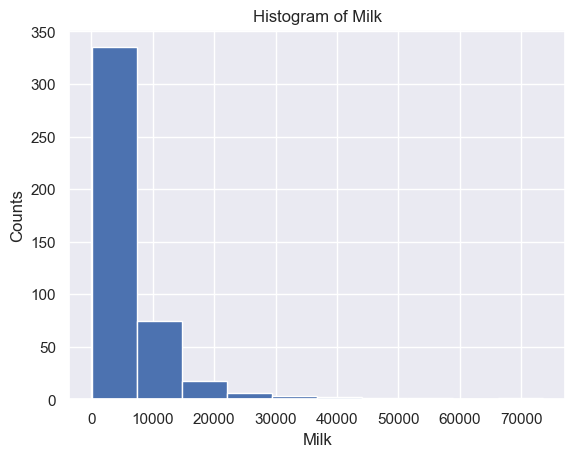

In [10]:
# Create Figure and Axes objects with which to do your plotting
fig, ax = plt.subplots()

# Plot the data using one of Matplotlib's plotting functions
ax.hist(df['Milk'])

# Customize other aspects of the plot
ax.set_title('Histogram of Milk')
ax.set_xlabel('Milk')
ax.set_ylabel('Counts')

# Display the plot
plt.show()

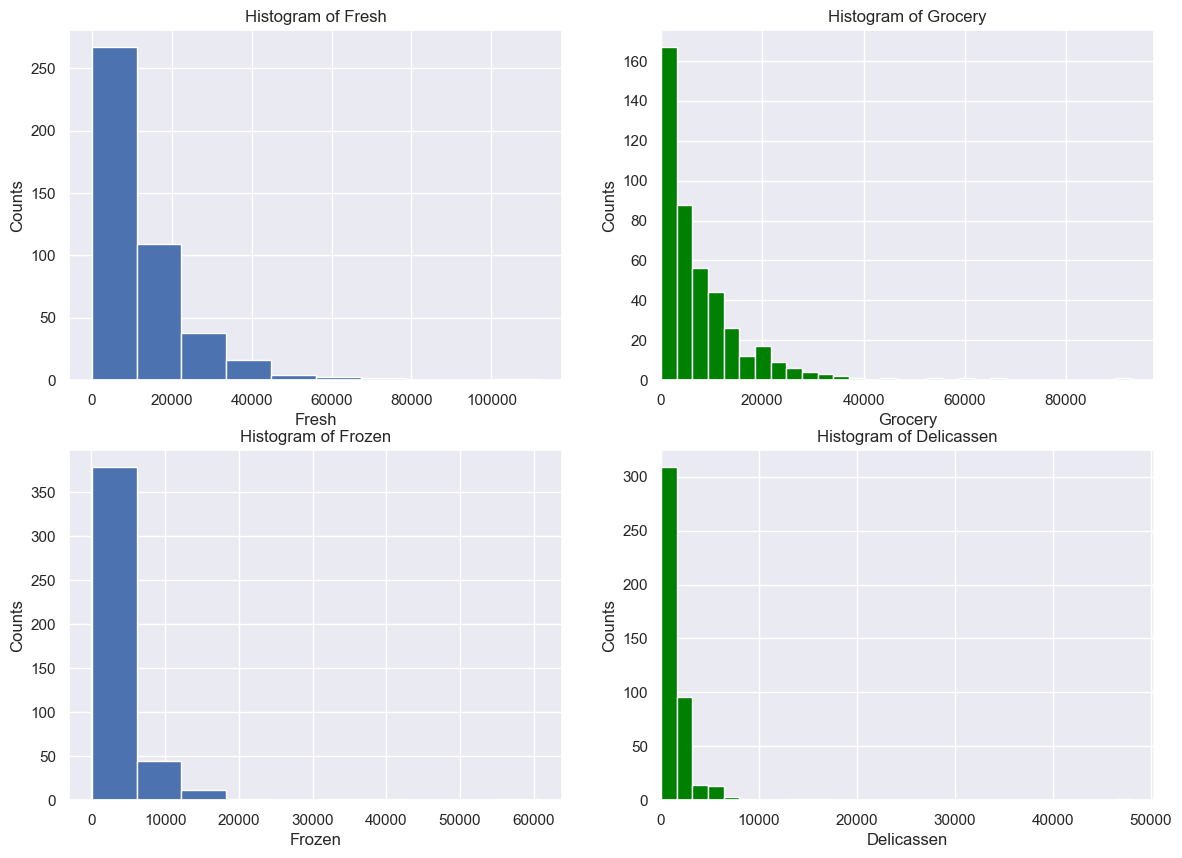

In [11]:
# with 4 subplots...

fig, axes = plt.subplots(nrows = 2, 
                         ncols = 2, 
                         figsize=(14, 10)        # units up to debate?
                        )

# Plot 0,0
axes[0,0].hist(df['Fresh'])
axes[0,0].set_title('Histogram of Fresh')
axes[0,0].set_xlabel('Fresh')
axes[0,0].set_ylabel('Counts')

# Plot 0,1
axes[0,1].hist(df['Grocery'], bins=30, color='green')
axes[0,1].set_title('Histogram of Grocery')
axes[0,1].set_xlabel('Grocery')
axes[0,1].set_ylabel('Counts')
axes[0,1].set_xlim(left=0)

# Plot 1,0
axes[1,0].hist(df['Frozen'])
axes[1,0].set_title('Histogram of Frozen')
axes[1,0].set_xlabel('Frozen')
axes[1,0].set_ylabel('Counts')

# Plot 1,1
axes[1,1].hist(df['Delicassen'], bins=30, color='green')
axes[1,1].set_title('Histogram of Delicassen')
axes[1,1].set_xlabel('Delicassen')
axes[1,1].set_ylabel('Counts')
axes[1,1].set_xlim(left=0)

plt.show()

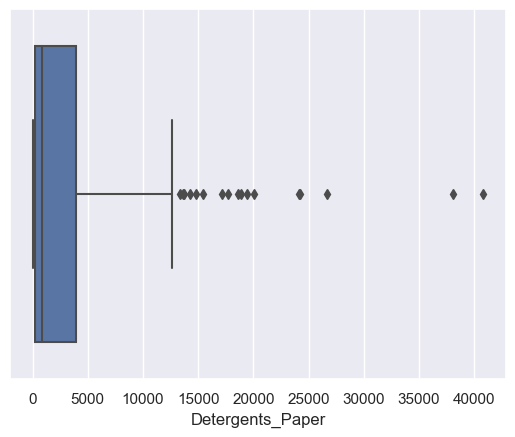

In [12]:
#boxplot
sns.boxplot(data=df, x="Detergents_Paper", whis=2.5)

plt.show()

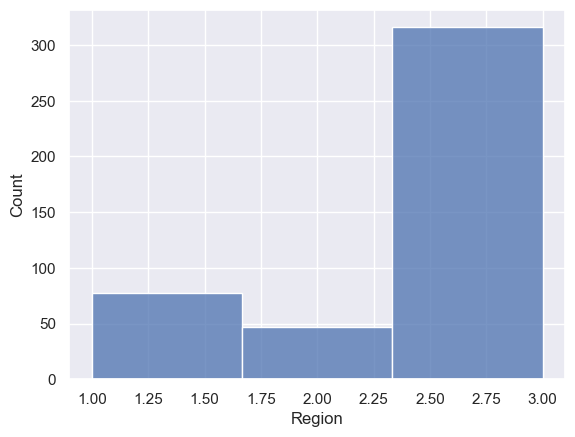

In [13]:
sns.set_theme(context = 'notebook',     # recomend   context = 'talk'
              style = 'darkgrid',
              palette = 'deep',         # colorblind
              font = 'sans-serif',
              font_scale = 1
             )
#seaborn histogram
sns.histplot(data=df, x="Region" , bins = 3)      

plt.show()

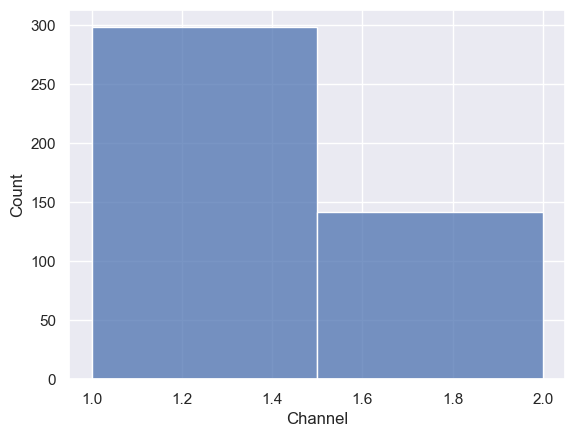

In [14]:
sns.set_theme(context = 'notebook',     # recomend   context = 'talk'
              style = 'darkgrid',
              palette = 'deep',         # colorblind
              font = 'sans-serif',
              font_scale = 1
             )
#seaborn histogram
sns.histplot(data=df, x="Channel" , bins = 2)      

plt.show()

In [15]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<AxesSubplot:>

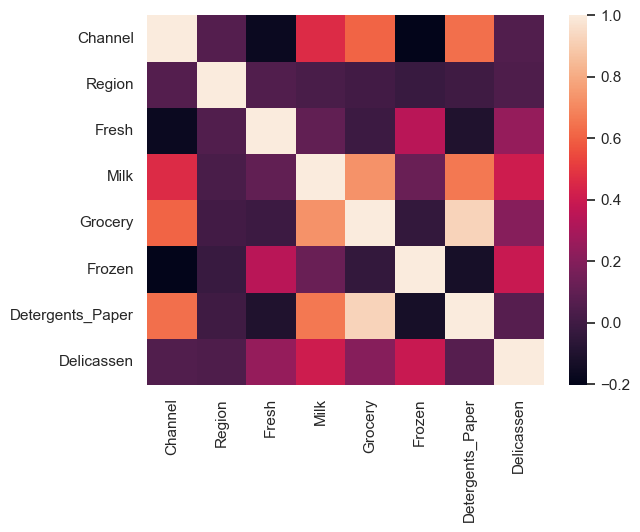

In [16]:
sns.heatmap(df.corr())

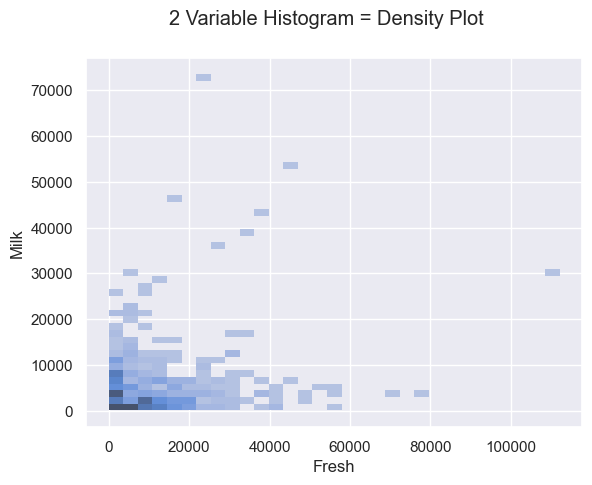

In [17]:
# correation between variables
sns.histplot(data=df, 
             x="Fresh", 
             y="Milk")

plt.suptitle("2 Variable Histogram = Density Plot")

plt.show()

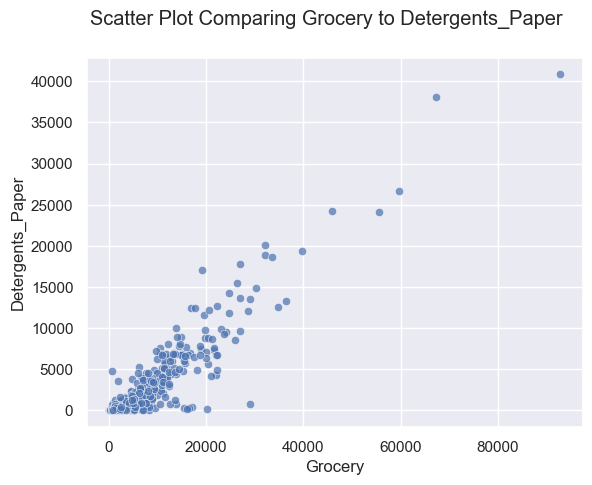

In [18]:
sns.scatterplot(data=df, 
                x="Grocery", 
                y="Detergents_Paper",
                alpha = 0.7)
plt.suptitle("Scatter Plot Comparing Grocery to Detergents_Paper")
plt.show()

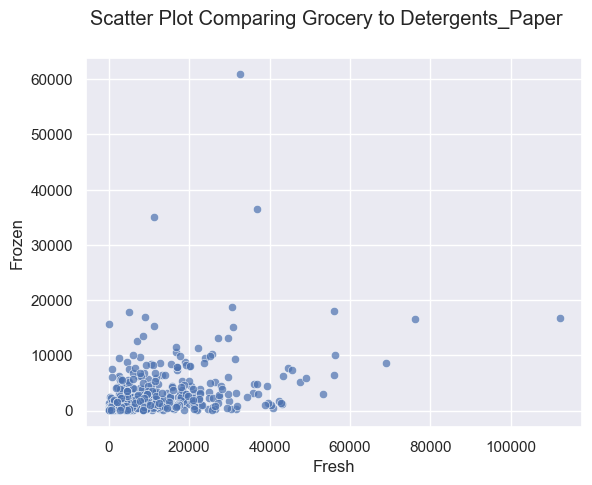

In [19]:
sns.scatterplot(data=df, 
                x="Fresh", 
                y="Frozen",
                alpha = 0.7)
plt.suptitle("Scatter Plot Comparing Grocery to Detergents_Paper")
plt.show()

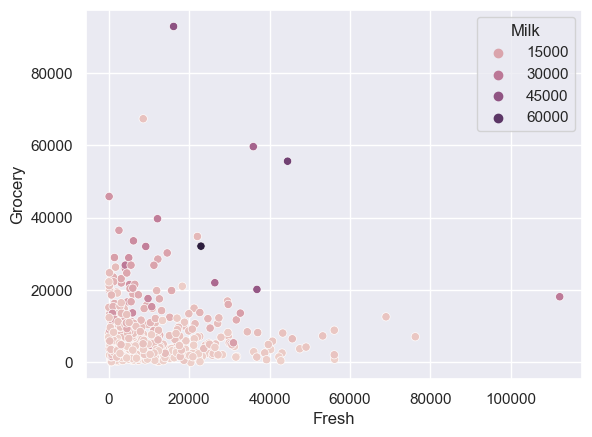

In [20]:

sns.scatterplot(data=df, x='Fresh', y='Grocery', hue='Milk')
plt.show()

In [21]:
import plotly.express as px

fig = px.scatter(df, x='Frozen', y='Detergents_Paper', color='Region', size='Delicassen', hover_data=['Channel'])
fig.show()

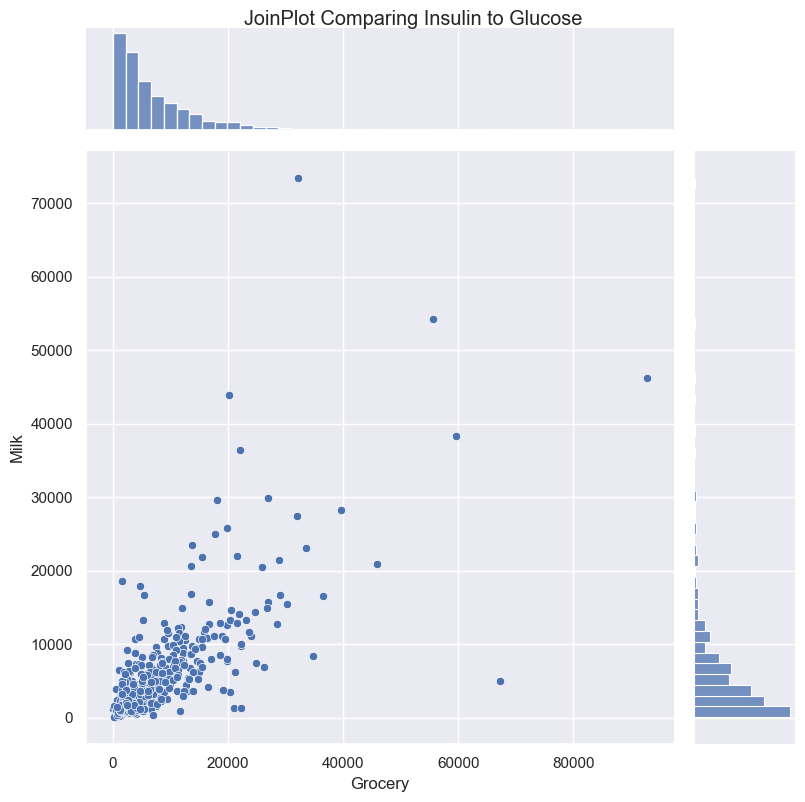

In [22]:
sns.jointplot(data=df, 
              x="Grocery", 
              y="Milk",
              height = 8    # a jointplot is a square by default 
            )
plt.suptitle("JoinPlot Comparing Insulin to Glucose", y=1)

plt.show()

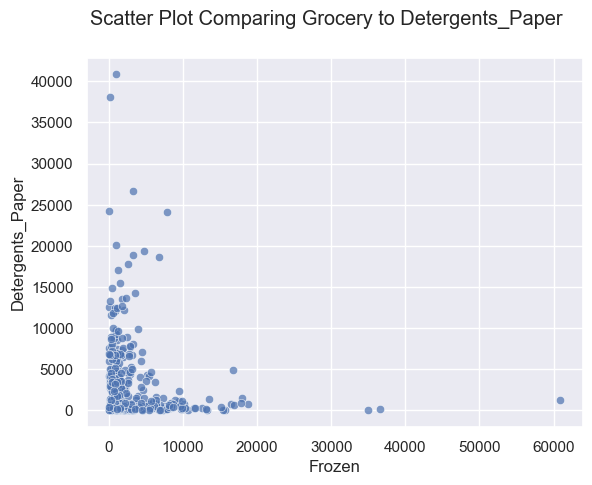

In [23]:
sns.scatterplot(data=df, 
                x="Frozen", 
                y="Detergents_Paper",
                alpha = 0.7)
plt.suptitle("Scatter Plot Comparing Grocery to Detergents_Paper")
plt.show()

Outliners

<AxesSubplot:xlabel='Milk', ylabel='Count'>

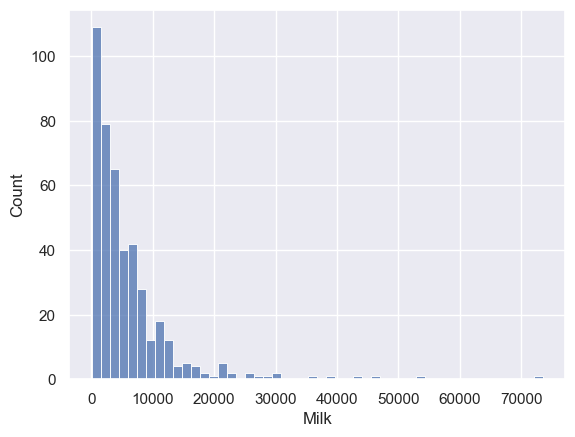

In [24]:
sns.histplot(x=df['Milk'])

<AxesSubplot:xlabel='Frozen'>

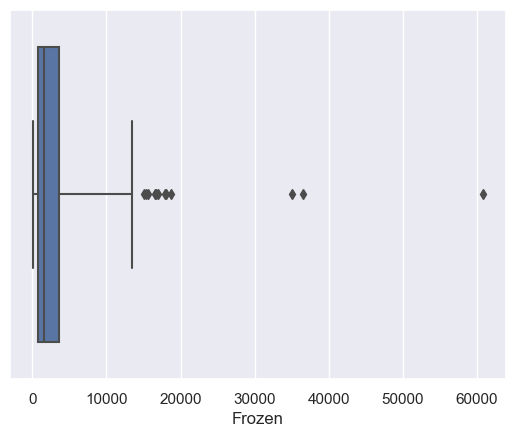

In [25]:
sns.boxplot(x=df['Frozen'], whis=4)

<AxesSubplot:xlabel='Grocery', ylabel='Delicassen'>

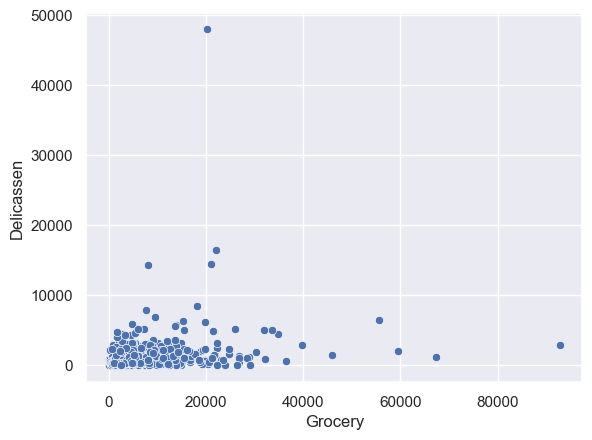

In [26]:
sns.scatterplot(data=df, x='Grocery', y='Delicassen')

In [27]:
#Let´s convert the categorical variables to meaningful data

df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [28]:
df.Region=df.Region.map({3:'Other',2:'Lisbon',1:'Oporto'})

In [29]:
df.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [30]:
df.Channel=df.Channel.map({1:'Horeca',2:'Retail'})

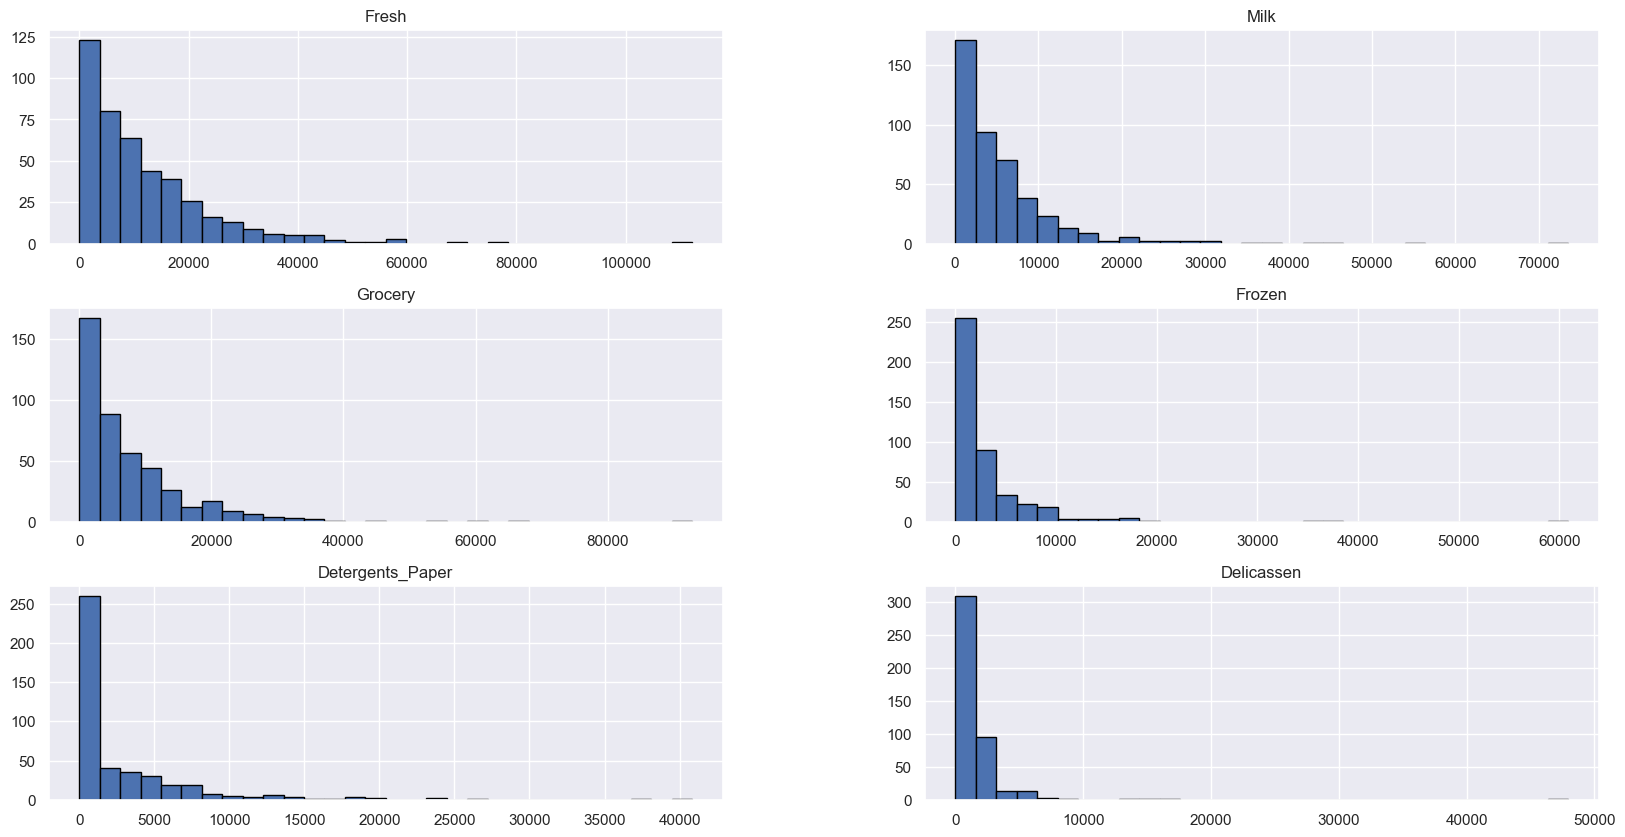

In [31]:
#Distribution of numeric variables

df.hist(figsize=(20,10),bins=30,  edgecolor='black')
plt.show()

In [32]:
import copy

In [33]:
df_copy = copy.deepcopy(df)

col = [
    "Fresh",
    "Milk",
    "Grocery",
    "Frozen",
    "Delicassen",
    "Detergents_Paper"
]

df_copy = df_copy[col]

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_copy)

df_scale = pd.DataFrame(scaler.transform(df_copy),columns = df_copy.columns)

In [35]:
print(df_scale)

        Fresh      Milk   Grocery    Frozen  Delicassen  Detergents_Paper
0    0.052933  0.523568 -0.041115 -0.589367   -0.066339         -0.043569
1   -0.391302  0.544458  0.170318 -0.270136    0.089151          0.086407
2   -0.447029  0.408538 -0.028157 -0.137536    2.243293          0.133232
3    0.100111 -0.624020 -0.392977  0.687144    0.093411         -0.498588
4    0.840239 -0.052396 -0.079356  0.173859    1.299347         -0.231918
..        ...       ...       ...       ...         ...               ...
435  1.401312  0.848446  0.850760  2.075222    0.241091         -0.566831
436  2.155293 -0.592142 -0.757165  0.296561    0.291501         -0.585519
437  0.200326  1.314671  2.348386 -0.543380    0.121456          2.511218
438 -0.135384 -0.517536 -0.602514 -0.419441    0.213046         -0.569770
439 -0.729307 -0.555924 -0.573227 -0.620094   -0.522869         -0.504888

[440 rows x 6 columns]


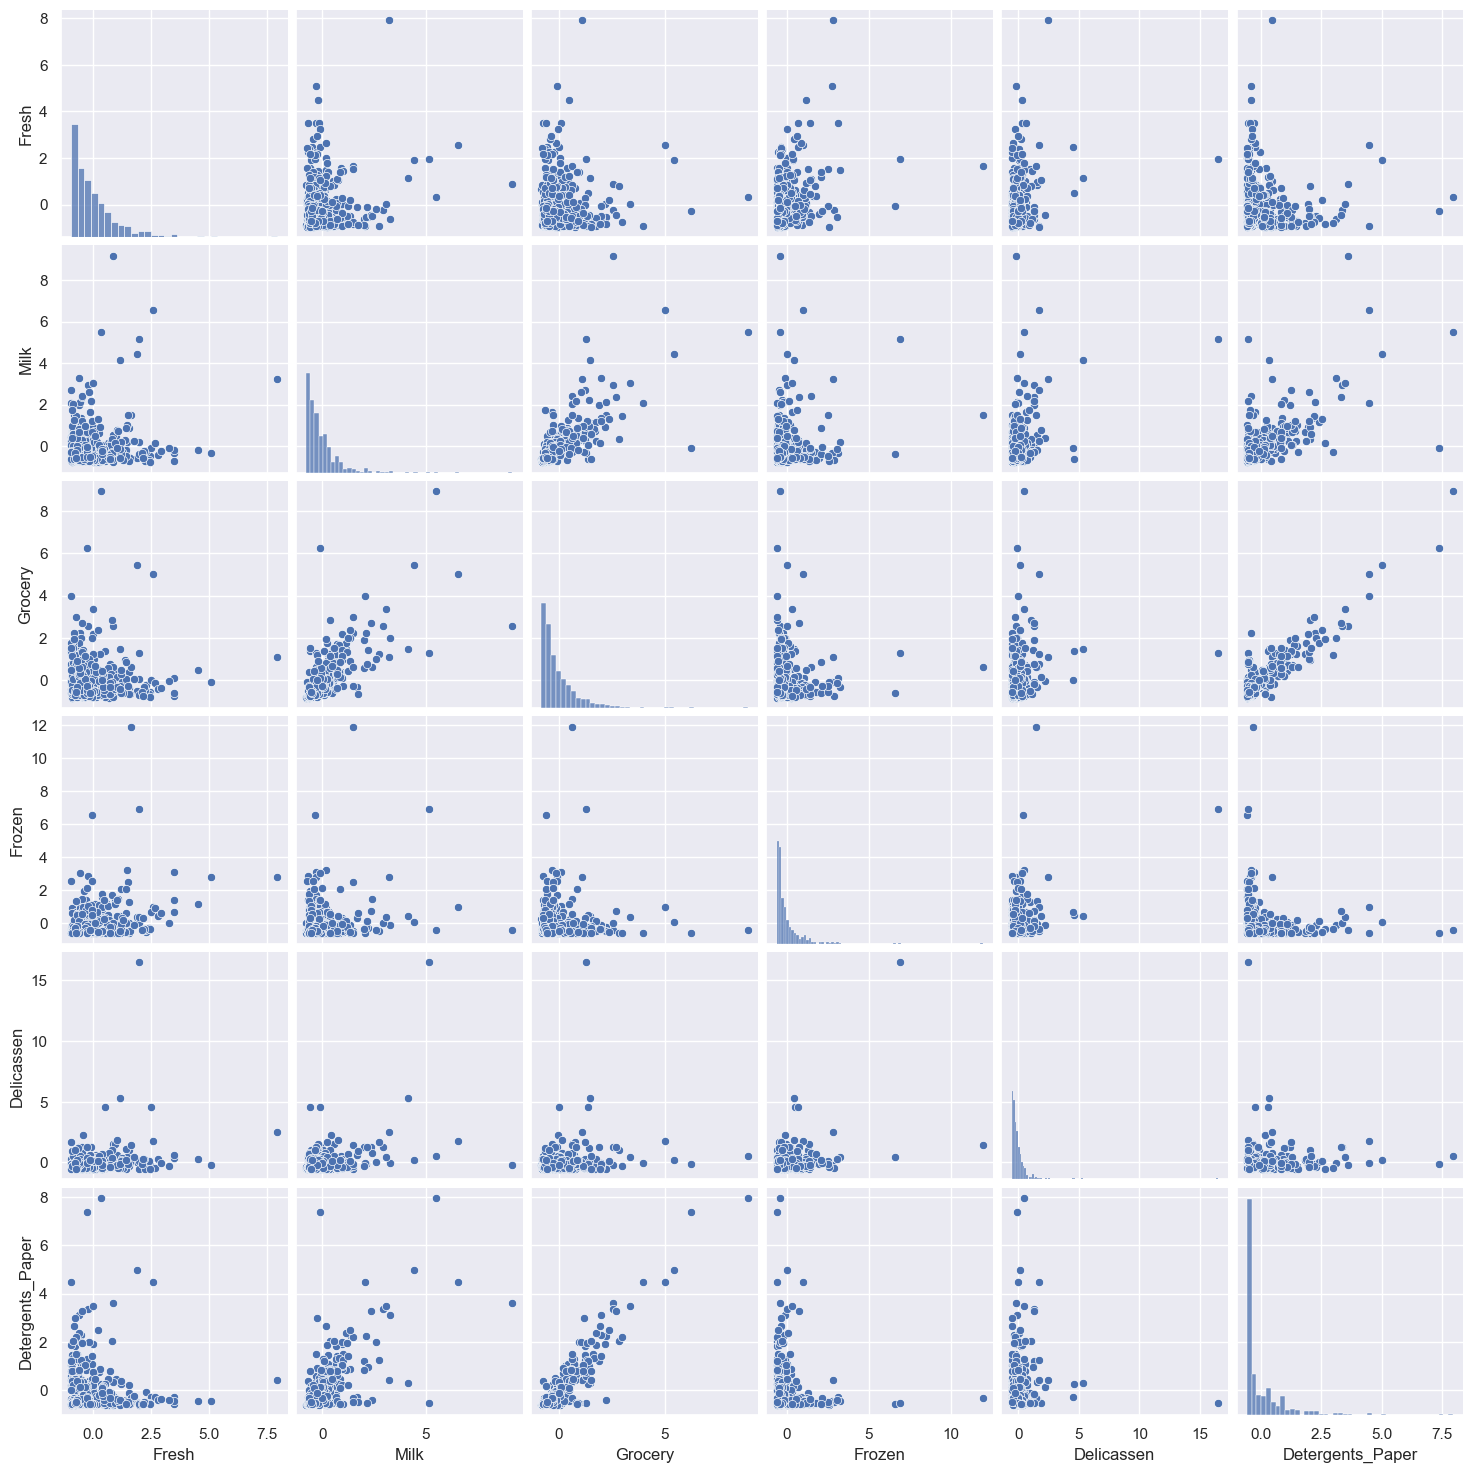

In [36]:
sns.pairplot(df_scale)
plt.show()

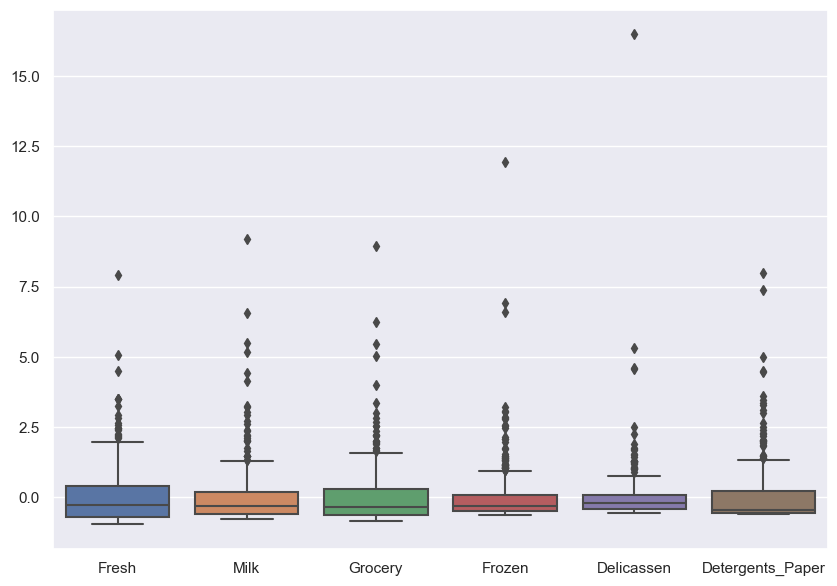

In [37]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df_scale)
plt.show()

In [38]:
from sklearn.preprocessing import Normalizer

n = Normalizer()
n.fit(df_copy)
df_norm = pd.DataFrame(n.transform(df_copy),columns = df_copy.columns)

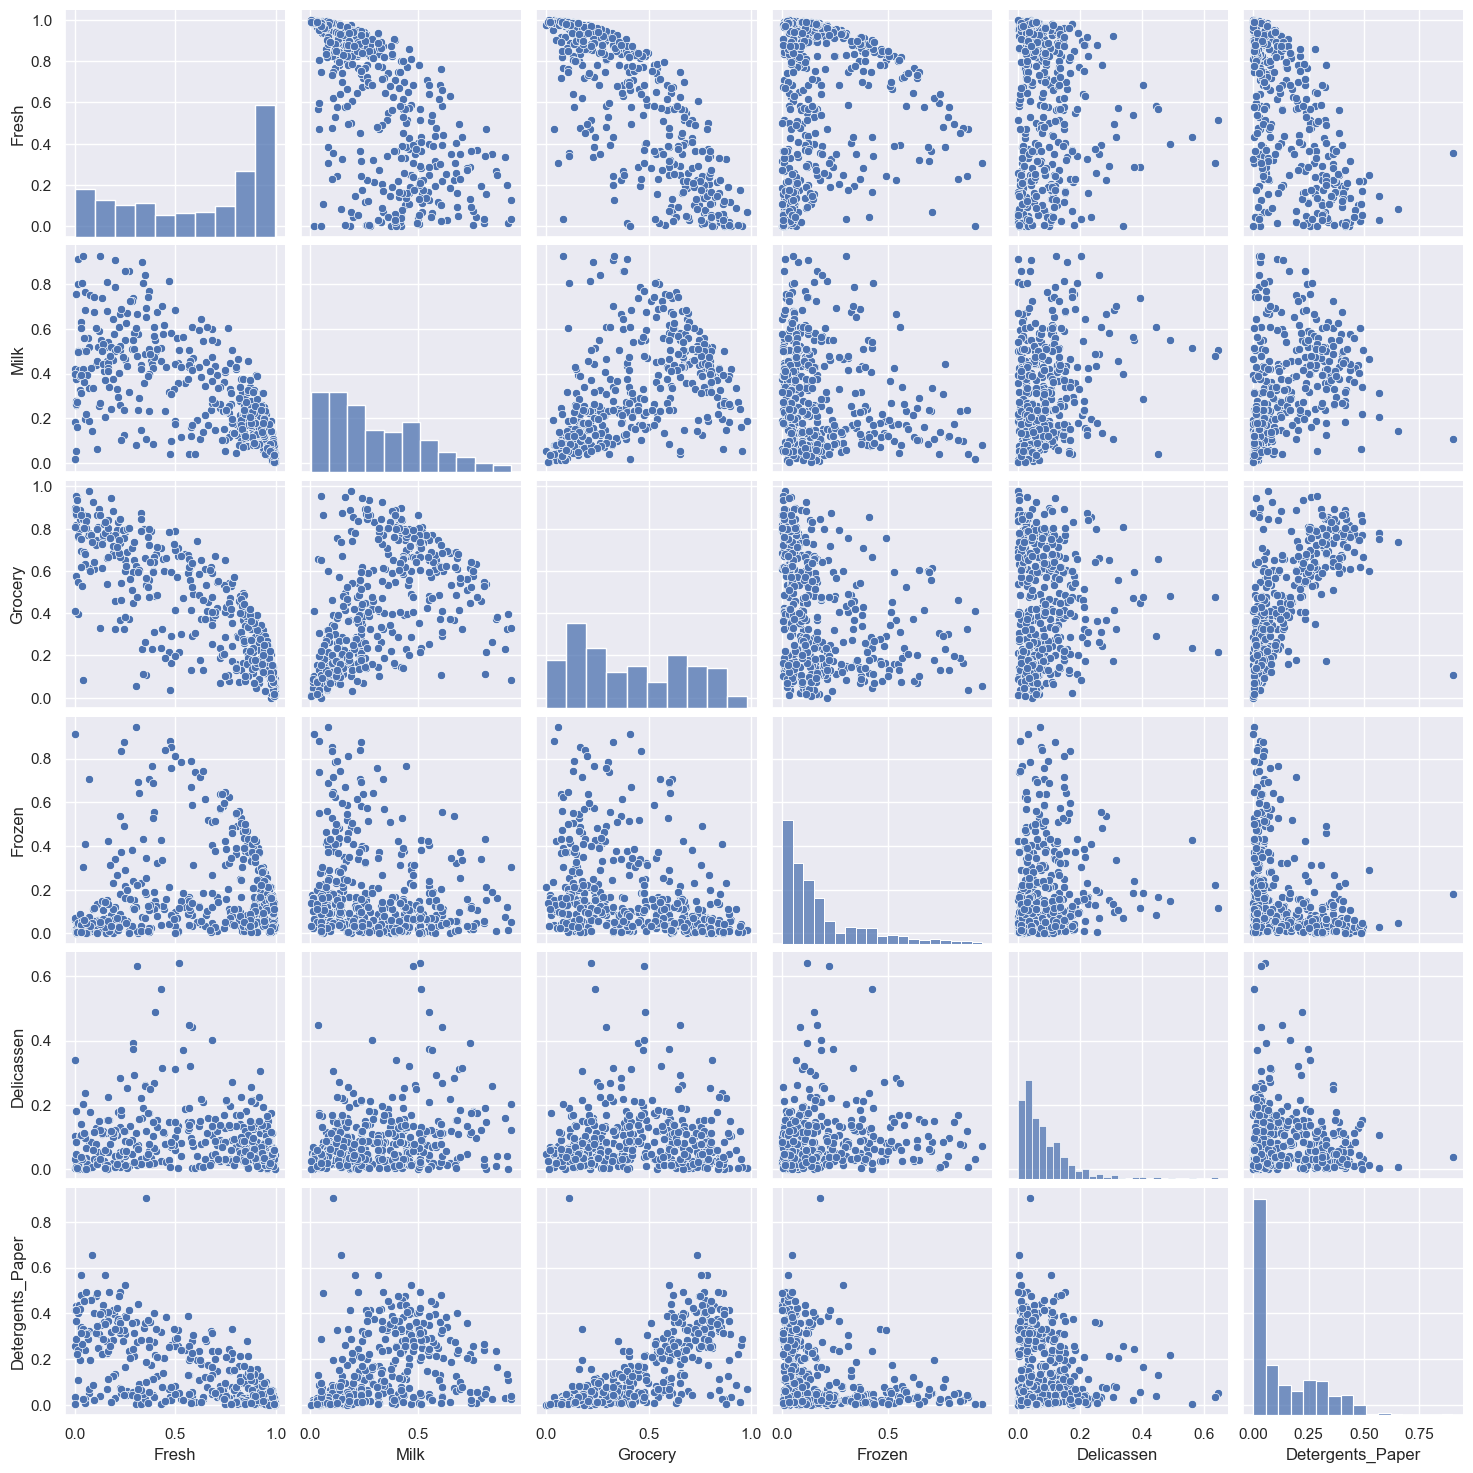

In [39]:
sns.pairplot(df_norm)
plt.show()

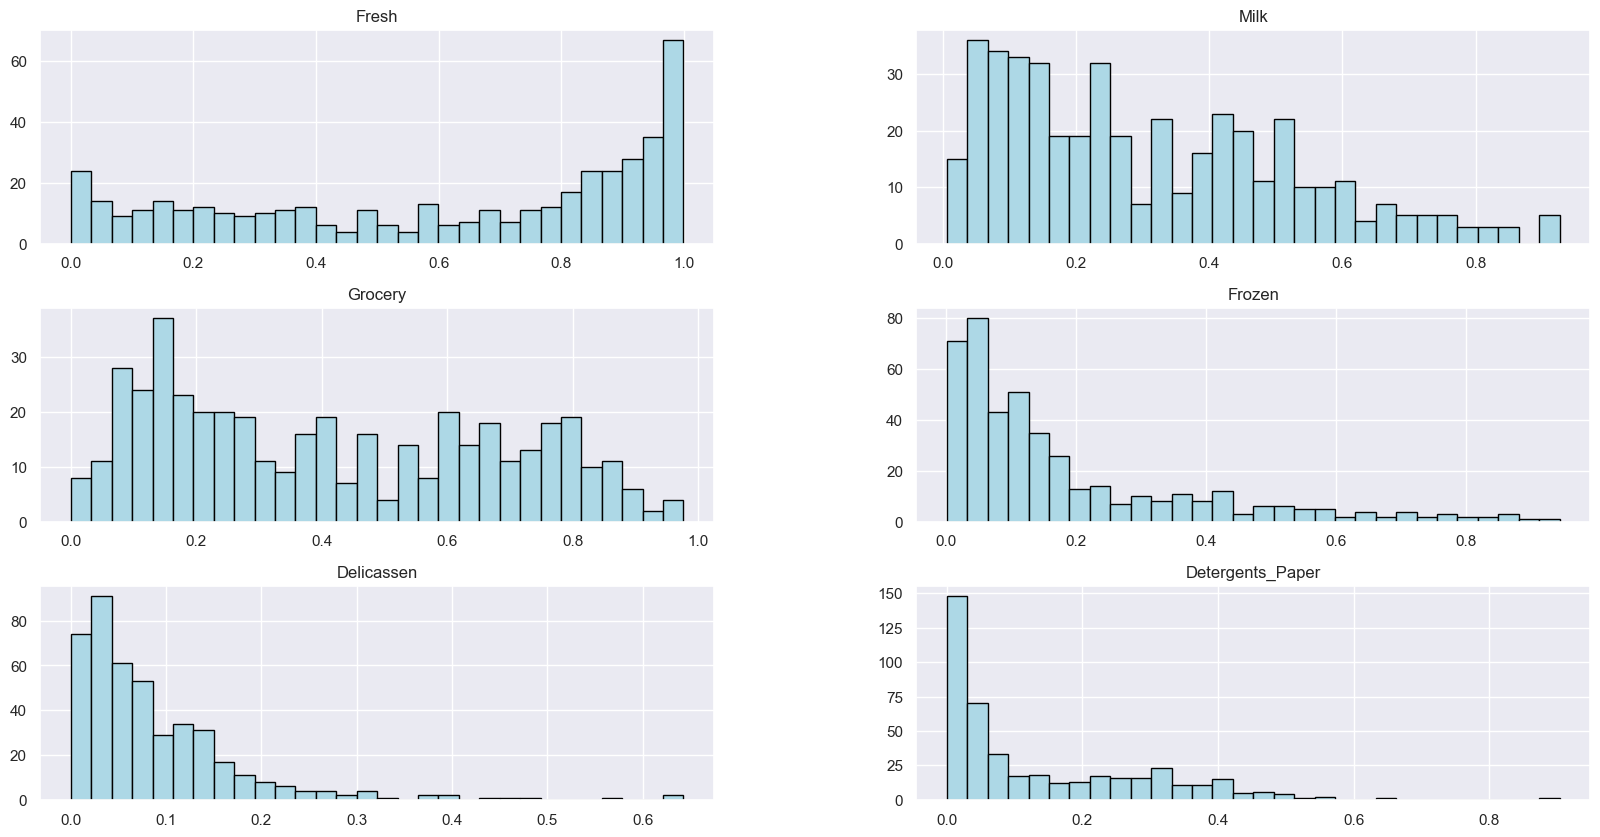

In [40]:
#Now the data resembles more the normal distribution

df_norm.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

In [41]:
# dummy variable
data=pd.get_dummies(data=df, columns= ['Region','Channel'], drop_first=True)

data.iloc[:,:6]= df_norm

In [42]:
data.iloc[:,:6]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.708333,0.539874,0.422741,0.011965,0.074809,0.149505
1,0.442198,0.614704,0.599540,0.110409,0.111286,0.206342
2,0.396552,0.549792,0.479632,0.150119,0.489619,0.219467
3,0.856837,0.077254,0.272650,0.413659,0.115494,0.032749
4,0.895416,0.214203,0.284997,0.155010,0.205294,0.070358
...,...,...,...,...,...,...
435,0.776890,0.315197,0.419191,0.343549,0.057646,0.004760
436,0.990872,0.036146,0.019298,0.113919,0.059258,0.002349
437,0.364462,0.388465,0.758545,0.010961,0.046827,0.372237
438,0.937737,0.180530,0.203404,0.094594,0.193653,0.015310


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [43]:
# dataframe of similar products
X = df_scale.loc[:,['Fresh', 'Milk','Frozen']]

In [44]:
X

,Fresh,Milk,Frozen
0,0.052933,0.523568,-0.589367
1,-0.391302,0.544458,-0.270136
2,-0.447029,0.408538,-0.137536
3,0.100111,-0.624020,0.687144
4,0.840239,-0.052396,0.173859
...,...,...,...
435,1.401312,0.848446,2.075222
436,2.155293,-0.592142,0.296561
437,0.200326,1.314671,-0.543380
438,-0.135384,-0.517536,-0.419441


In [45]:
from sklearn.cluster import KMeans
from sklearn import metrics

km = KMeans(n_clusters = 3)
km.fit(X)

KMeans(n_clusters=3)

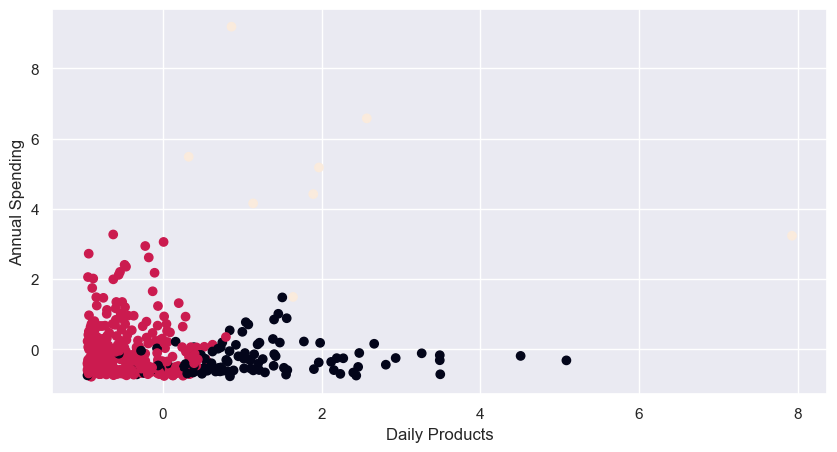

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= km.labels_)
plt.xlabel('Daily Products')
plt.ylabel('Annual Spending');

In [47]:
def plot_distortion(X,max_clusters = 16):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

c:\Users\14312\anaconda3\envs\test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



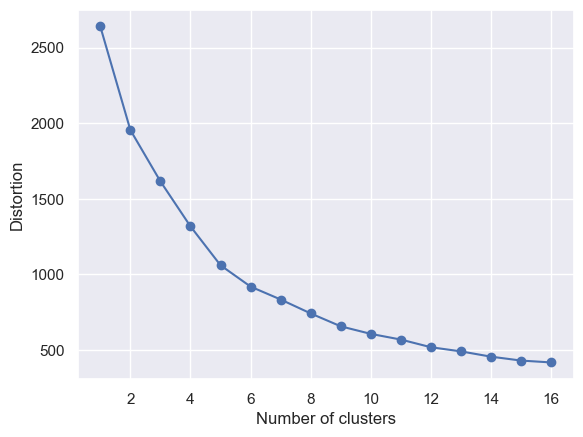

In [48]:
plot_distortion(df_scale)


In [49]:
def silhouette(X,max_clusters = 9):
    distortions = []
    
    for i in range(2, max_clusters +1):
        
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0).fit(X)
        
        labels = km.labels_
        
        distortions.append((i,metrics.silhouette_score(X, labels, metric='euclidean')))

    return(distortions)

In [50]:
silhouette(df_scale)


[(2, 0.6136936741219485),
 (3, 0.33968745809017253),
 (4, 0.3485293345157602),
 (5, 0.3703290834084098),
 (6, 0.36318352539854604),
 (7, 0.30154621080559),
 (8, 0.3061935306428036),
 (9, 0.32623875553906967)]

In [57]:
km = KMeans(
    n_clusters = 3,
    n_init = 10,
    random_state = 0
)

y_km = km.fit_predict(df_scale)

In [58]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='.',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()


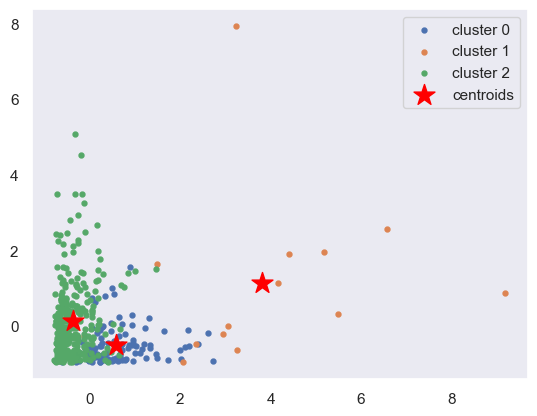

In [59]:
scaleda = df_scale[['Milk','Fresh','Frozen']]
A = scaleda.values
plot_clusters(A, y_km, plt_cluster_centers=True)

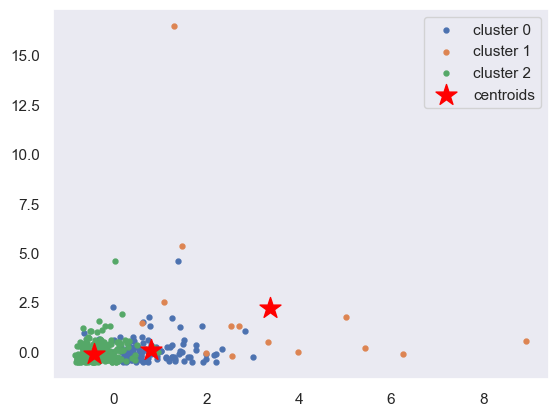

In [60]:
scaledb = df_scale[['Grocery','Delicassen']]
B = scaledb.values
plot_clusters(B, y_km, plt_cluster_centers=True)

In [57]:
silhouette(df_norm)


[(2, 0.5133893914731825),
 (3, 0.46088057836621954),
 (4, 0.391474513022192),
 (5, 0.37949123386859135),
 (6, 0.37264686126139307),
 (7, 0.35572396670681083),
 (8, 0.34493457585804077),
 (9, 0.29490072301872766)]

In [59]:
km2 = KMeans(
    n_clusters = 3,
    n_init = 10,
    random_state = 0
)

y_km2 = km2.fit_predict(df_norm)

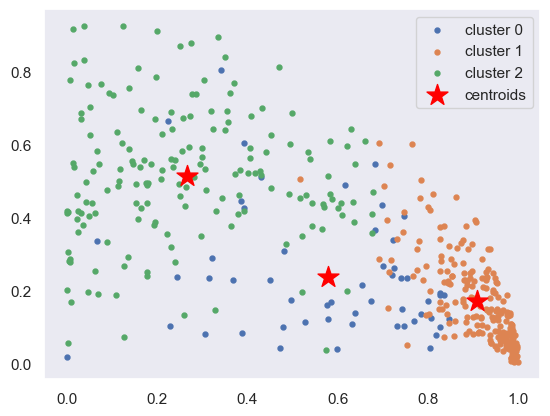

In [60]:
scaleda2 = df_norm[['Fresh','Milk','Frozen']]
A2 = scaleda2.values
plot_clusters(A2, y_km2, plt_cluster_centers=True)


# Part III - Hierarchical Clustering

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [98]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
hierarchy=AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward', compute_distances=True)

df['Hierarchical_clusters']=hierarchy.fit_predict(data)


In [99]:
reduced2=pd.DataFrame(np.column_stack([reduced, df['Hierarchical_clusters']]), columns=['Comp1','Comp2','Cluster_K_Means','Hierarchical_Clusters'])

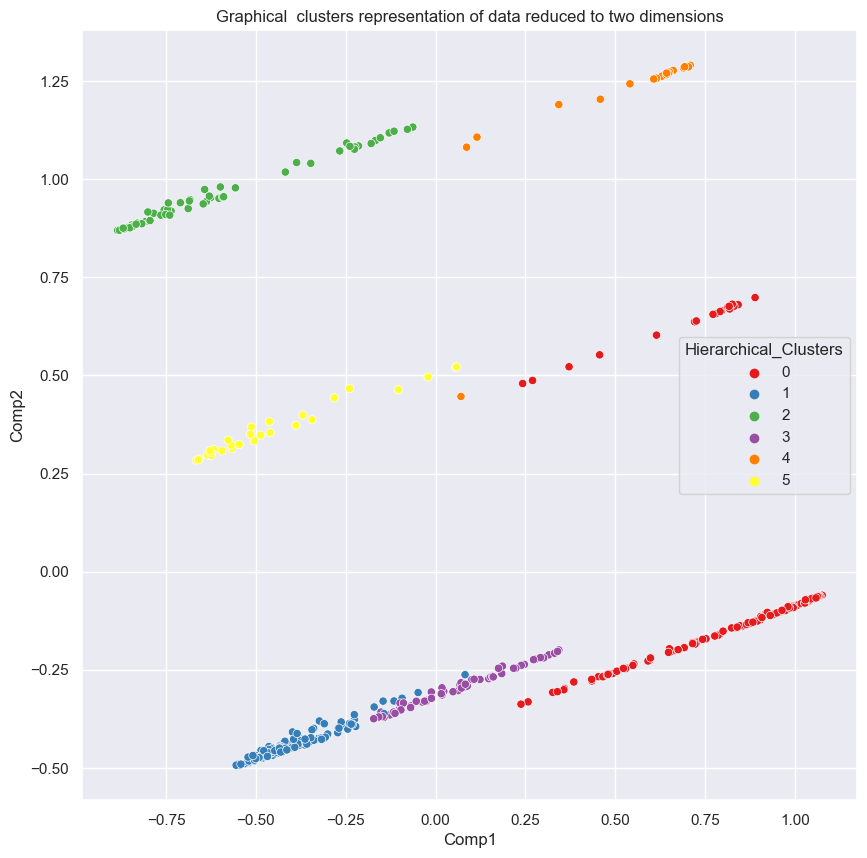

In [100]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=reduced2, hue='Hierarchical_Clusters', x='Comp1',y='Comp2', palette='Set1')
plt.title('Graphical  clusters representation of data reduced to two dimensions',  fontsize=12)
plt.show()

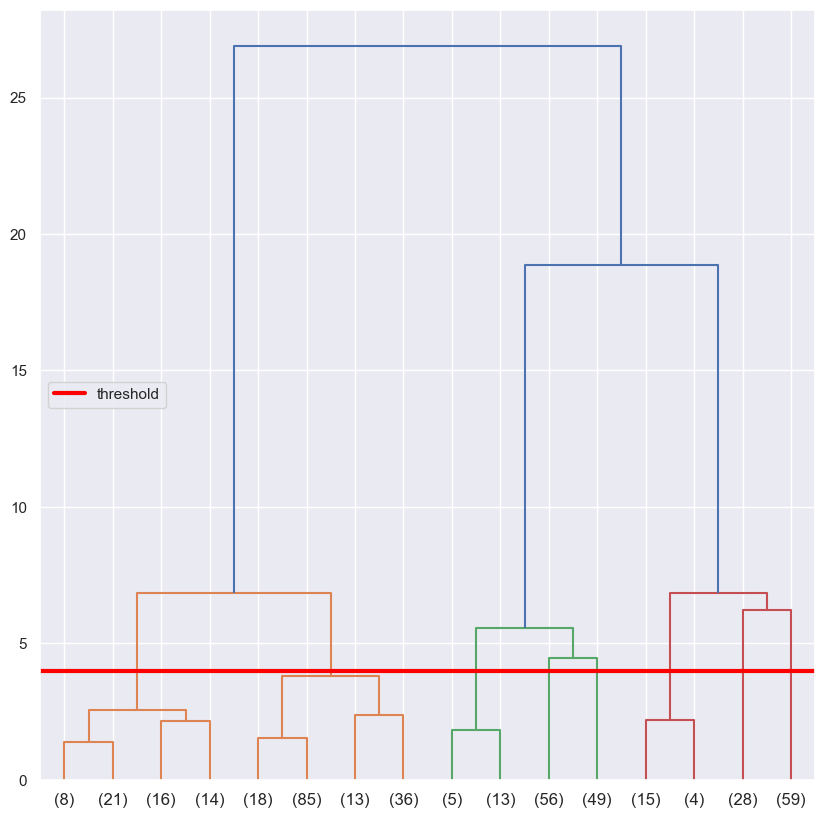

In [101]:
plt.figure(figsize=(10,10))
dendrogram(linkage(data ,method='ward'), truncate_mode='level', p=3 )
plt.axhline(y=4, label='threshold', color='red', lw=3)
plt.title='Dendrogram'
plt.legend(loc=6)
plt.show()


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [87]:
from sklearn.model_selection import cross_validate

elbow_results=[]
for i in range(2,10):
    kmeans=KMeans(init='k-means++' , n_clusters=i, random_state=0)
    results=cross_validate(kmeans, data, cv=5)
    elbow_results.append(results['test_score'].mean()*-1)

In [88]:
kmeans=KMeans(init='k-means++' , n_clusters=3, random_state=0)

cluster_model=kmeans.fit(data)


df['clusters']=cluster_model.predict(data).astype('str')

data['clusters']=df['clusters']

In [89]:
pca=PCA(n_components=len(data.columns)-1)

pca.fit(data.iloc[:,:-1])

pca.explained_variance_ratio_

array([0.39102064, 0.34662426, 0.11240418, 0.05297299, 0.04085815,
       0.03129052, 0.01094772, 0.00717143, 0.0067101 ])

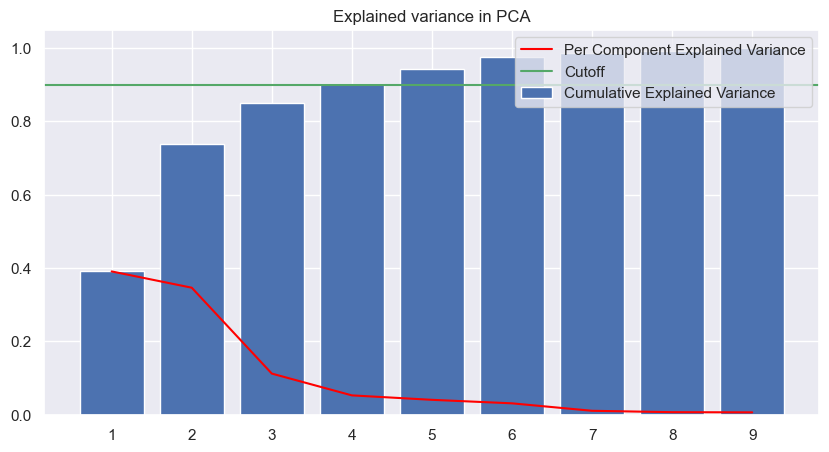

In [90]:
plt.figure(figsize=(10,5))
plt.plot(range(1,10),pca.explained_variance_ratio_, c='red', label='Per Component Explained Variance')
plt.bar(range(1,10), height=np.cumsum(pca.explained_variance_ratio_), label='Cumulative Explained Variance')
plt.axhline(y=0.9, c='g', label='Cutoff')
plt.title('Explained variance in PCA')
plt.xticks(range(1,10))
plt.legend(loc=1)
plt.show()

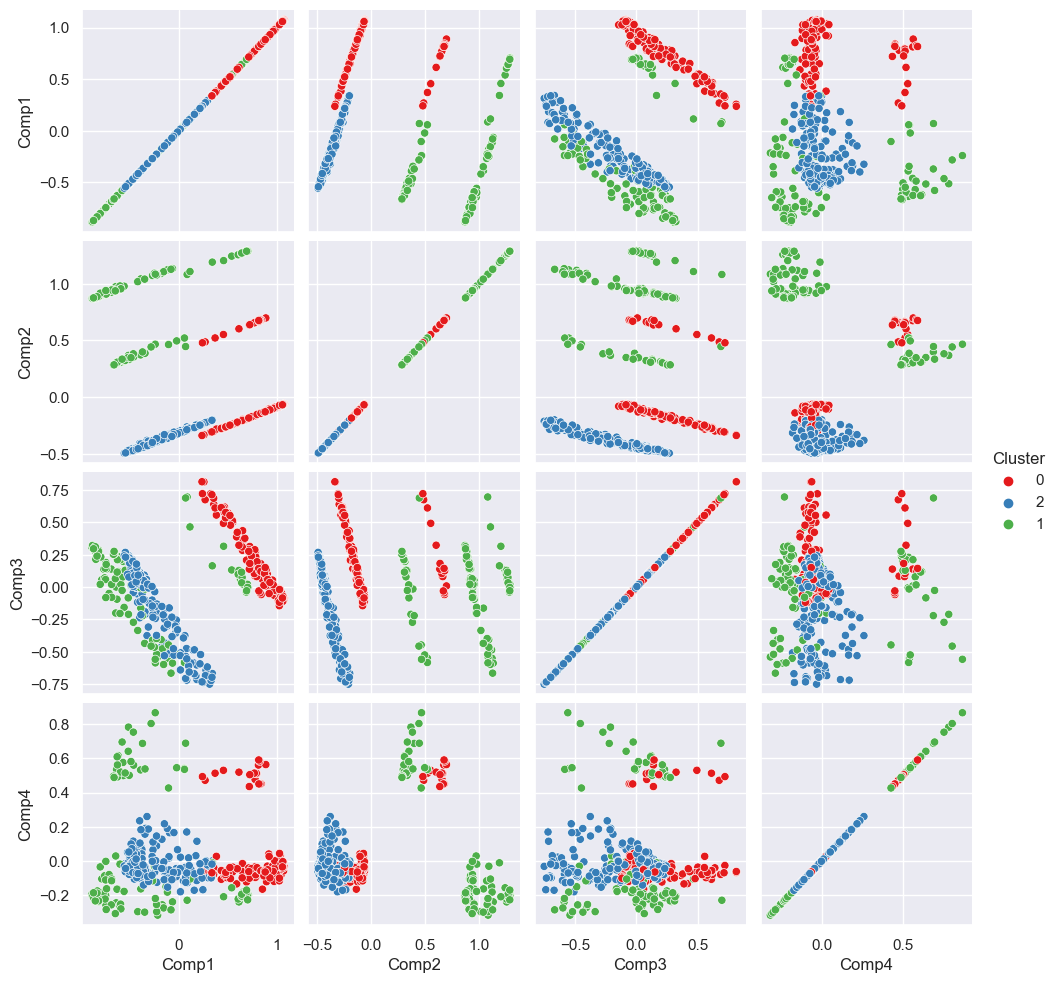

In [91]:
pca=PCA(n_components=4)
reduced=pca.fit_transform(data.iloc[:,:-1])

reduced=pd.DataFrame(np.column_stack([reduced, data.clusters]), columns=['Comp1','Comp2','Comp3','Comp4','Cluster'])

sns.pairplot(reduced, hue='Cluster', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.show()

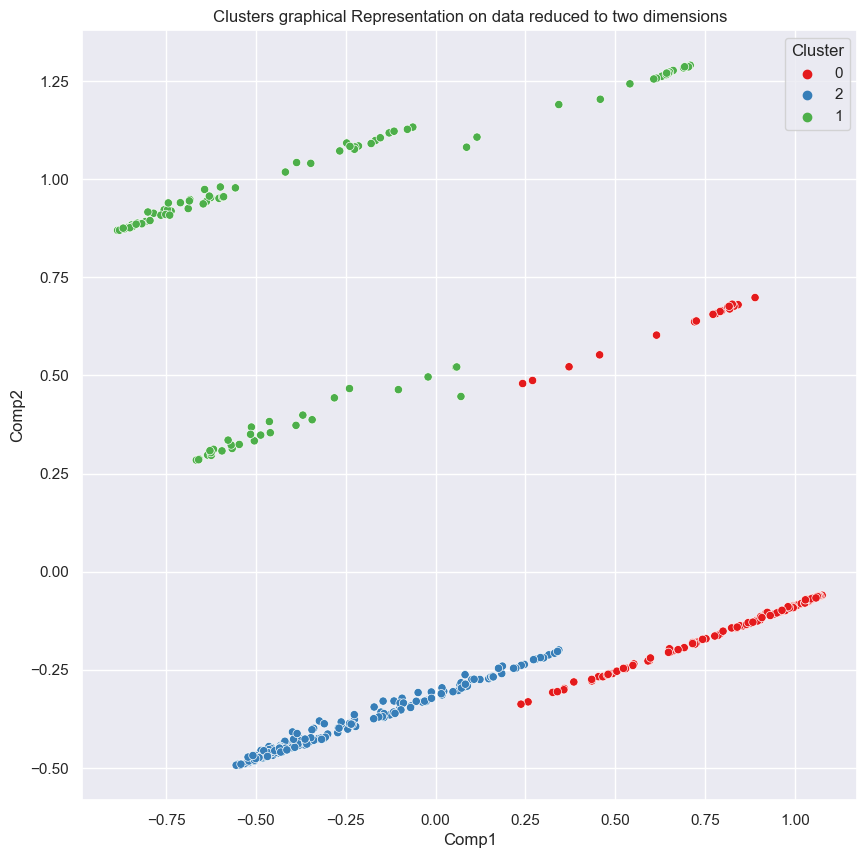

In [92]:
pca=PCA(n_components=2)
reduced=pca.fit_transform(data.iloc[:,:-1])
reduced=pd.DataFrame(np.column_stack([reduced, df.clusters]), columns=['Comp1','Comp2','Cluster'])

plt.figure(figsize=(10,10))
sns.scatterplot(data=reduced, hue='Cluster', x='Comp1',y='Comp2', palette='Set1')
plt.title('Clusters graphical Representation on data reduced to two dimensions',  fontsize=12)
plt.show()

<Figure size 1000x1000 with 0 Axes>

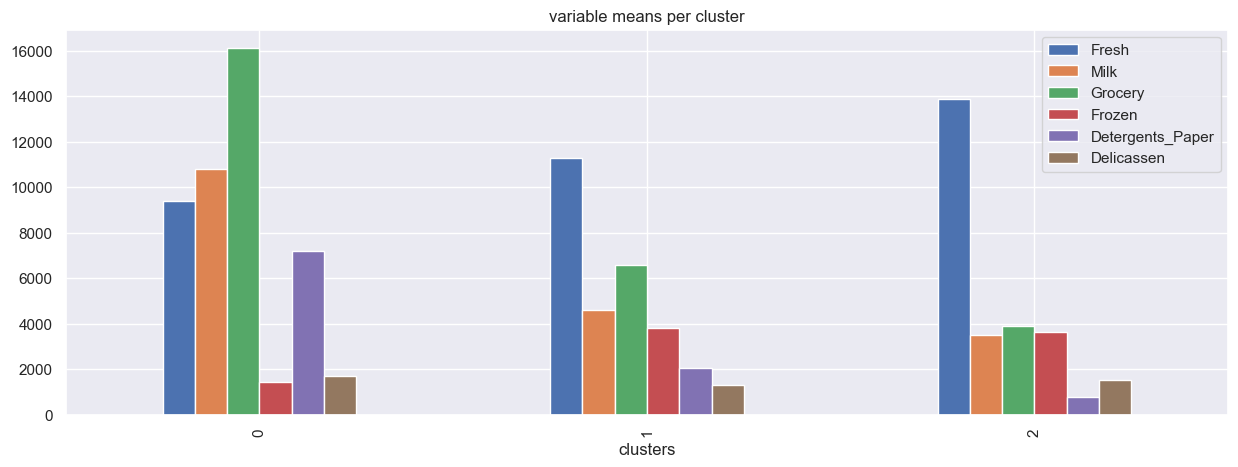

In [93]:
means=df.iloc[:,2:].groupby('clusters').mean()


plt.figure(figsize=(10,10))
means.groupby('clusters').mean().plot(kind='bar', figsize=(15,5))
plt.title('variable means per cluster')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

### -> In this project, I built various EDA for data exploration and understanding of datasets. Thus, I found the distributor’s annual spending between 10k to 20k on every product not more than that.
### -> Dataset is not normally distributed and scaled thus, I did normalize and scale data, so our machine learning model work properly and we get proper output.
### -> In k mean clustering use the elbow rule and I found a number of clusters 8 also I created a data point and centroid with various clusters. And also, to minimize the sum of distances between the points and their respective cluster centroid.
### -> In Hierarchical clustering, I get the numbers in parenthesis are numbers of observations.
### -> In PCA, I implemented dimensionality reduction to 4 components because on 4 components I get 90% of explained variability.

